In [66]:
#imports
from matplotlib import image
from matplotlib import pyplot
import numpy as np

In [67]:
#load image
dog = image.imread('dog.jpg')

In [68]:
#print datatype and shape
print(dog.dtype)
#height, width, color (for this example)
print(dog.shape)

uint8
(300, 332, 3)


In [69]:
#display image
def display_image(image):
    pyplot.imshow(image)
    pyplot.show() 

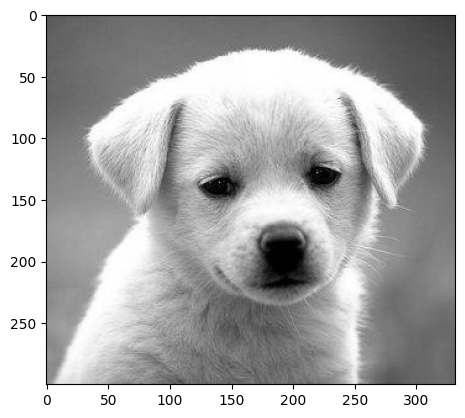

In [70]:
display_image(dog)

In [71]:
#function to invert the image by finding 255 - pixel value
def invert_image(image):
    image_i = 255 - image
    return image_i

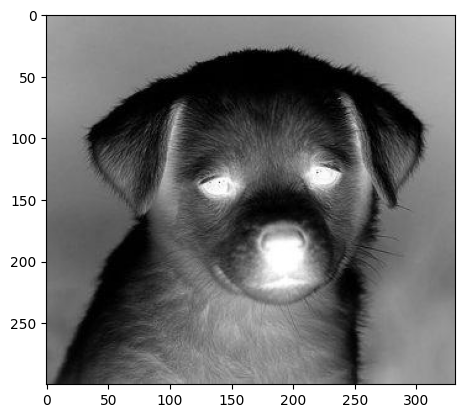

In [72]:
#invert and print out new image
dog_i = invert_image(dog)
display_image(dog_i)

In [73]:
#binary threshold - setting all pixel values above threshold to one value
def binary_threshold(image, threshold):
    b_image = np.where(image > threshold, 255, 0)
    return b_image

In [74]:
binary_dog = binary_threshold(dog, 220)

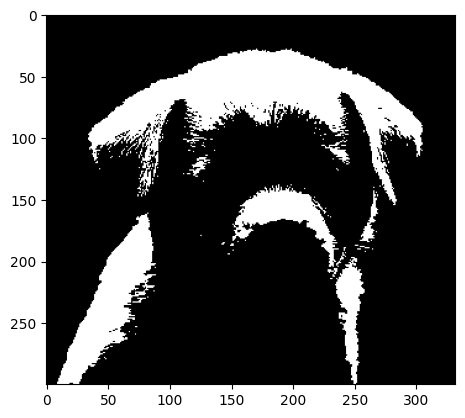

In [75]:
display_image(binary_dog)

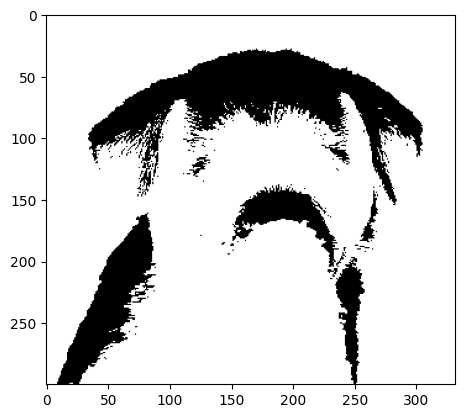

In [77]:
inverted_binary_dog = invert_image(binary_dog)
display_image(inverted_binary_dog)

In [78]:
#functions to flip image
def flip_horizontal(image):
    return image[:,::-1]

def flip_vertical(image):
    return image[::-1,:]

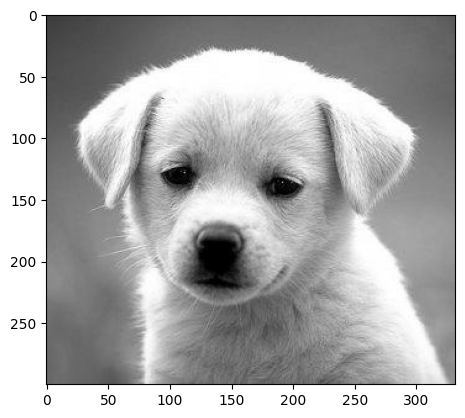

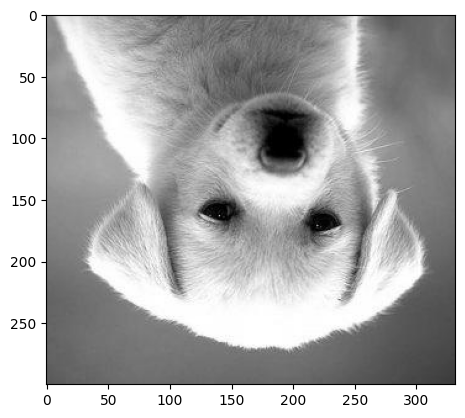

In [79]:
flip_h_dog = flip_horizontal(dog)
display_image(flip_h_dog)
flip_v_dog = flip_vertical(dog)
display_image(flip_v_dog)

In [81]:
# edge detection
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

In [92]:
def convolve(image, kernel):
    image_h, image_w, channels = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    output = np.zeros((image_h, image_w, channels))

    for c in range(channels):
        for i in range(image_h):
            for j in range(image_w):
                region = padded_image[i:i+kernel_h, j:j+kernel_w, c]
                output[i,j] = np.sum(region*kernel)

    return output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-556.0..612.0].


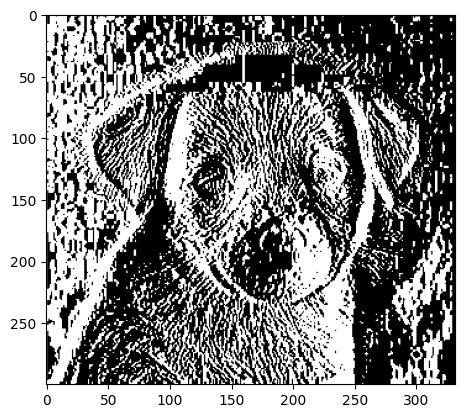

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-922.0..522.0].


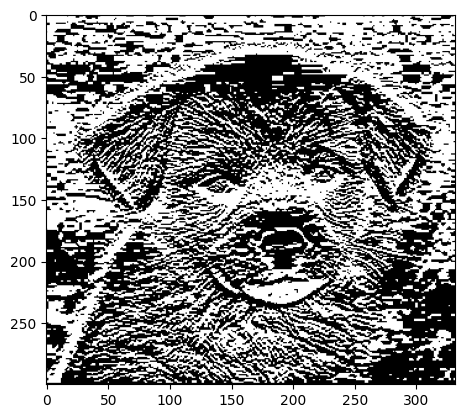

In [97]:
edge_x_of_dog = convolve(dog, sobel_x)
edge_y_of_dog = convolve(dog, sobel_y)
display_image(edge_x_of_dog)
display_image(edge_y_of_dog)